In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Метод градиентного спуска

## Функция одной переменной

In [2]:
def f_1(x):
    return 3 * np.power(x, 2)

In [3]:
def df_1(x):
    return  6 * x

In [4]:
x0 = 5
lmbda = 0.1
result = []

while True:
    result.append([x0, f_1(x0)])
    x1 = x0 - lmbda * df_1(x0)
    if np.linalg.norm(x0 - x1) <= 0.0000000001:
        break
    x0 = x1
    
res_1 = pd.DataFrame(data = result, columns = ['x', 'y'])

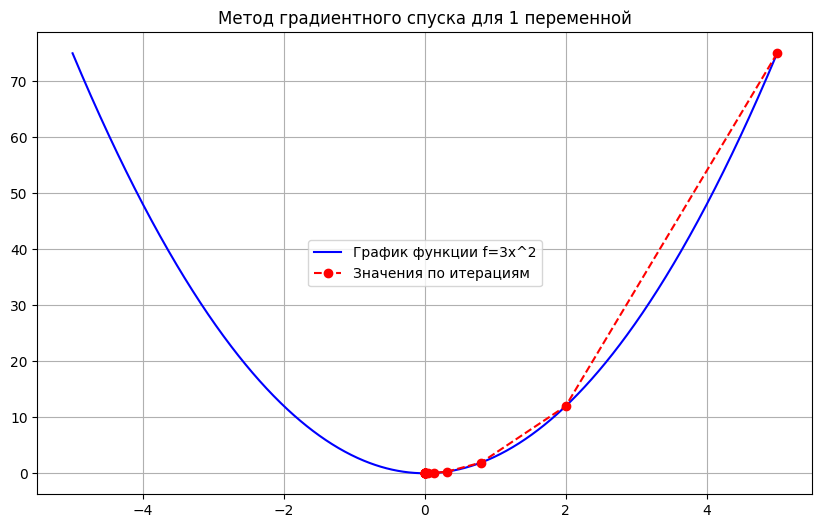

In [5]:
plt.figure(figsize=(10, 6))

x_f1 = np.linspace(-5, 5, 1000)
y_f1 = f_1(x_f1)

plt.plot(x_f1, y_f1, color = 'blue', label='График функции f=3x^2')
plt.plot(res_1['x'], res_1['y'], marker = "o", linestyle='--', color = 'red', label='Значения по итерациям')

plt.title('Метод градиентного спуска для 1 переменной')
plt.legend(loc='center')
plt.grid(True)
plt.show()

## Функция двух переменных

In [6]:
def f_2(x, y):
    return 3 * x**2 + 5 * y**2 

In [7]:
def df_2(x, y):
    return np.array([6 * x, 10 * y])

In [8]:
x0 = np.array([5, 10])
lmbda = 0.1

result = []

while True:
    result.append(np.append(x0, f_2(*x0)))
    x1 = x0 - lmbda * df_2(*x0)
    if np.linalg.norm(x0 - x1) <= 0.0000000001:
        break
    x0=x1

np.power(x0-x1, 2)

array([2.92066698e-21, 0.00000000e+00])

# Метод наискорейшего спуска

In [2]:
def f_3(x):
    return 3 * x**2

In [3]:
def df_3(x):
    return 6 * x

In [39]:
def func_w(lambda_, x0):
#по другому не работает
    return f_3(x0 - lambda_ * df_3(x0))

x0 = 5
result = []
lmbda = 0.2
k = 1

while True:
    res = minimize(func_w, lmbda, args=(x0,), bounds=[(0, None)])
    lambda_ = (res.x[0]) ** 1/k
    result.append([x0, f_3(x0), lambda_, k])
    
    x1 = x0 - lambda_ * df_3(x0)

    if np.abs(x0-x1) <= 0.0000000001:
        break
    x0 = x1
    k += 1

result_df = pd.DataFrame(result, columns=["x0", "f_3(x0)", "lambda", "k"])

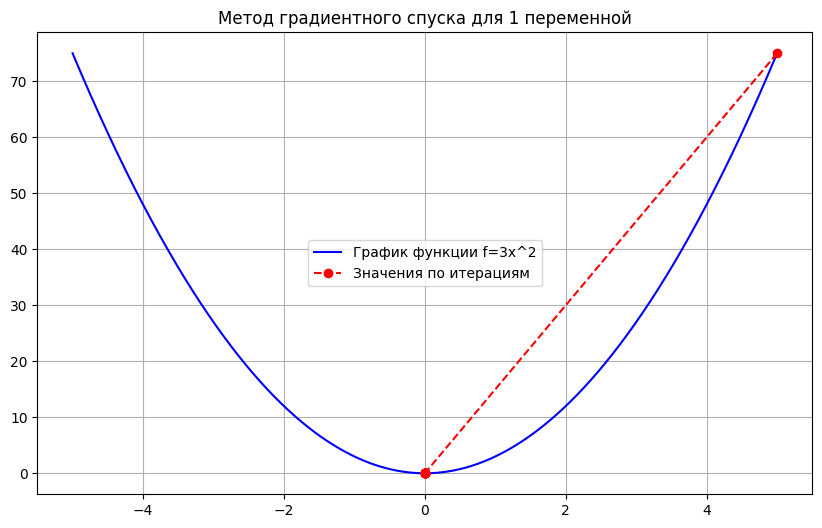

In [28]:
plt.figure(figsize=(10, 6))

x_f3 = np.linspace(-5, 5, 1000)
y_f3 = f_3(x_f3)

plt.plot(x_f3, y_f3, color = 'blue', label='График функции f=3x^2')
plt.plot(result_df['x0'], result_df['f_3(x0)'], marker = "o", linestyle='--', color = 'red', label='Значения по итерациям')

plt.title('Метод градиентного спуска для 1 переменной')
plt.legend(loc='center')
plt.grid(True)
plt.show()